In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\Tushar Bhor\Downloads\Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
#Count of churn
data['Churn'].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
np.nan

nan

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [10]:
data['TotalCharges'][488]

' '

In [11]:
data.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [12]:
data[data['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
data[data['TotalCharges']== ' '].count()

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

In [14]:
len(data[data['TotalCharges']== ' '].index)

11

In [15]:
data['TotalCharges'].dtype

dtype('O')

In [16]:
#replacing space values to 'nan'  and conerting to numeric datatype
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['TotalCharges'].dtype

dtype('float64')

In [17]:
data['TotalCharges'].median()

1397.475

In [18]:
values = (data['TotalCharges']/data['MonthlyCharges']).median()*data['MonthlyCharges']
values

0        860.629872
1       1641.972236
2       1552.593589
3       1219.586050
4       2038.409782
           ...     
7038    2444.938465
7039    2975.443981
7040     853.421917
7041    2145.087521
7042    3046.081944
Name: MonthlyCharges, Length: 7043, dtype: float64

In [19]:
values[1]

1641.9722356739308

In [20]:
values.count()

7043

In [21]:
np.isnan(data['TotalCharges'][488])

True

In [22]:
data['TotalCharges'].isna().sum()

11

In [23]:
data['TotalCharges'] = values.where(data['TotalCharges'] == np.nan, other =data['TotalCharges'])

In [24]:
values[488]

1515.1122209774373

In [25]:
data['TotalCharges'][488]

nan

In [26]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [27]:
data['TotalCharges'][2]

108.15

In [28]:
data.Contract.describe()

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

In [29]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [30]:
data.TotalCharges.isna().sum()

11

<AxesSubplot:xlabel='Churn', ylabel='count'>

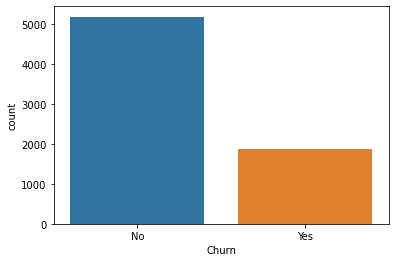

In [31]:
sns.countplot(data['Churn'])

In [32]:
no_data = data[data['Churn']=='No'].shape[0]
yes_data = data[data['Churn']=='Yes'].shape[0]
no_data, yes_data

(5174, 1869)

In [33]:
no_data

5174

In [34]:
yes_data

1869

In [35]:
#  Print the percent of customers stayed
print(no_data/(no_data+yes_data)*100, '% of customers stayed with the company')
#Print the percent of customers left
print(yes_data/(no_data+yes_data)*100, '% of customers stayed with the company')

73.4630129206304 % of customers stayed with the company
26.536987079369588 % of customers stayed with the company


<AxesSubplot:xlabel='gender', ylabel='count'>

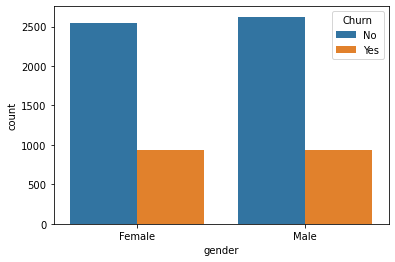

In [36]:
#Visualize the churn count as per gender
sns.countplot(data = data,x = 'gender', hue = 'Churn')
#Gender is not affecting the churn as almost same amount of both males & females has been churned & not churned

In [37]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

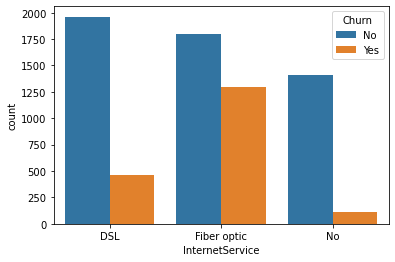

In [38]:
#The customers churning are highly from 'Fiber optic' and not churning are highly from 'DSL'
sns.countplot(data = data, x = 'InternetService', hue = 'Churn')

In [39]:
len(data[data['TotalCharges']==  np.nan].index)

0

In [40]:
data['TotalCharges'].isna().sum()

11

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

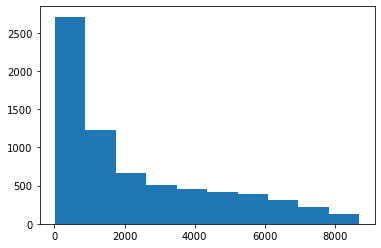

In [41]:
plt.hist(data['TotalCharges'])

In [42]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [43]:
data['TotalCharges'].isna().sum()

0

In [44]:
data['TotalCharges'][488]

1397.475

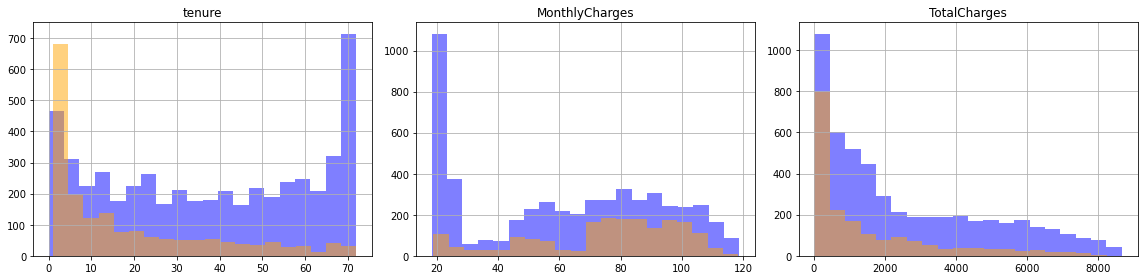

In [45]:
# Lets look at numeric features(cols)
fig, ax = plt.subplots(1,3, figsize = (16,4))

data[data['Churn'] == 'No'][['tenure','MonthlyCharges', 'TotalCharges']].hist(bins =20, color = 'blue', alpha = 0.5, ax = ax)
data[data['Churn']=='Yes'][['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins = 20, color = 'orange', alpha = 0.5, ax = ax)
plt.tight_layout()

#From thisplot we can say that, mostly customers stayed has the monthlychargeas around '20-30$' &  
#churn is high where monthlycharges is around '70-105$'
# Most of the customers churned , churned betn 0-10 months & did not churn are highly from 65-72 months
# i.e One who left had the low tenure and the one who stayed has the high tenure

In [46]:
nf = data[['tenure', 'MonthlyCharges']]
data[data['Churn'] == 'No'][['tenure','MonthlyCharges']]

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
3,45,42.30
6,22,89.10
7,10,29.75
...,...,...
7037,72,21.15
7038,24,84.80
7039,72,103.20
7040,11,29.60


In [47]:
df = data.drop('customerID', axis = 1)
df.shape

(7043, 20)

In [48]:
df['tenure'].dtype == np.number

False

In [70]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [49]:
#Convert all the non numeric columns to numeric using labelEncoder()
from sklearn.preprocessing import LabelEncoder

for column in (df.columns):
    if df[column].dtype == np.number :
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [50]:
#New Data set data types
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [51]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [53]:
df['MonthlyCharges'].dtype == np.number

True

In [54]:
df['MonthlyCharges'].dtype

dtype('float64')

In [55]:
#Creating X & y for ML algorithm
X = df.drop('Churn', axis = 1)
y = df['Churn']
X.shape, y.shape

((7043, 19), (7043,))

In [56]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99424194],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17324413],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.95967407],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85446945],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.87206242],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.01428802]])

In [57]:
from sklearn.model_selection import train_test_split
#Splitting data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [58]:
from sklearn.linear_model import LogisticRegression as lm
model = lm()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
#Creating predhttp://localhost:8888/notebooks/ML%20Assignment%203%20(Logistic).ipynb#iction values
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
len(y_predict)

1409

In [61]:
y_predict.tolist().count(1)

311

In [62]:
y_predict.tolist().count(0)

1098

In [63]:
#Checking precision, recall and f1 score
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1098
           1       0.52      0.62      0.57       311

    accuracy                           0.79      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.81      0.79      0.80      1409



In [64]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.7920511000709723

In [65]:
confusion_matrix(y_test,y_predict)

array([[923, 118],
       [175, 193]], dtype=int64)

In [66]:
error_rate = (y_predict != y_test).mean()
error_rate

0.20794889992902768

In [67]:
recall_score(y_test,y_predict)

0.5244565217391305

In [68]:
f1_score(y_test,y_predict)

0.5684830633284241

In [69]:
precision_score(y_test,y_predict)

0.6205787781350482